In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Temperature Dataset(Bias_correction).csv')#,parse_dates=['Date']
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
#dtypes: float64(24), object(1)

In [9]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [10]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

!!!!!!!!!

In [11]:
for col in df.columns:
    if df[col].dtype=="float64":
        print(df[col].value_counts())
        print()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64

24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.5      1
15.0      1
13.6      1
14.2      1
29.6      1
Name: Present_Tmin, Length: 155, dtype: int64

51.810596    2
71.658089    2
77.030350    2
98.524734    2
19.794666    2
            ..
44.005089    1
58.655628    1
58.761993    1
42.186558    1
71.359451    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64

58.936283    2
96.525200    2
91.776146    2
88.876610    2
92.531029    2
            ..
83.450928  

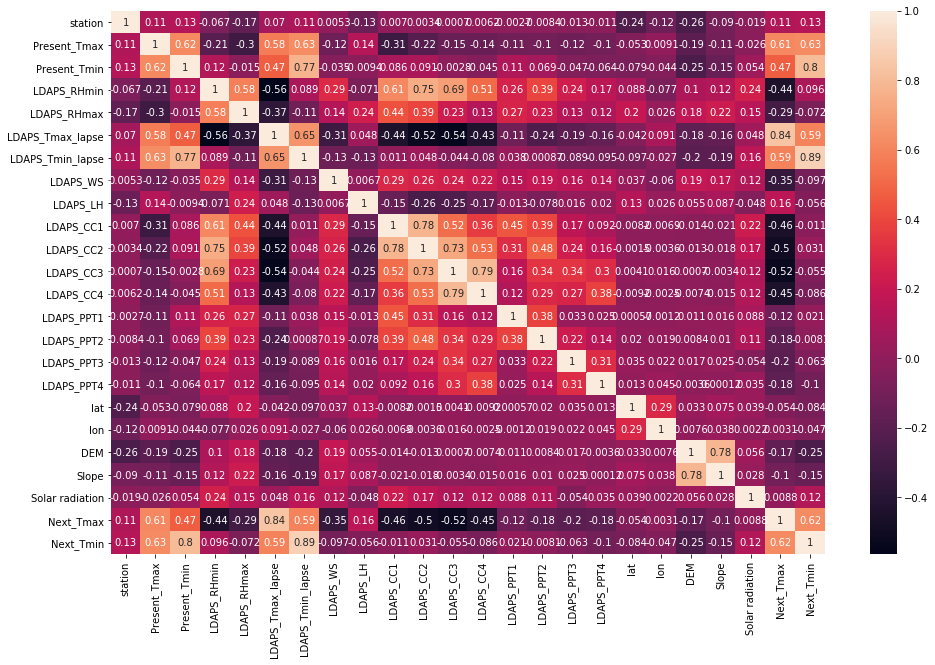

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

In [13]:
# Next_Tmax,Next_Tmin tARGET VARIABLES

In [14]:
#Next_Tmax-
#Next_Tmin

In [15]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [16]:
#!pip install --upgrade pip

In [17]:
#!pip install fancyimpute

In [18]:
#!easy_install fancyimpute

In [19]:
df['Date'].value_counts()

2014-07-29    25
2015-08-05    25
2017-07-29    25
2015-07-31    25
2016-08-29    25
              ..
2016-06-30    25
2014-07-20    25
2014-08-13    25
2014-08-05    25
2013-07-30    25
Name: Date, Length: 310, dtype: int64

In [20]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [21]:
#df.drop(['Date'], axis=1, inplace=True)

In [22]:
df['Date'].fillna('2017-08-30', inplace=True)

In [23]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,2017-08-30,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [24]:
df.isnull().sum()

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [25]:
df['station'].value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

In [26]:
df['station'].fillna('1.0',limit=1,inplace=True)

In [27]:
df['station'].fillna('2.0',limit=1,inplace=True)

In [28]:
df['station'].astype(float)

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
7747    23.0
7748    24.0
7749    25.0
7750     1.0
7751     2.0
Name: station, Length: 7752, dtype: float64

In [29]:
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].median())

df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].median())

df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].median())

df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].median())

df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].median())

df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].median())

In [30]:
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].median())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].median())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].median())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].median())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].median())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].median())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].median())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].median())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].median())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].median())

In [31]:
df.isnull().sum()

station              0
Date                 0
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [32]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,2017-08-30,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [33]:
#using knn imputer 

Data filling

In [34]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Date']=pd.DataFrame(le.fit_transform(df.Date))

In [36]:
from sklearn.impute import KNNImputer
x=df
imputer = KNNImputer(n_neighbors=4)

x = imputer.fit_transform(x.values)

x = pd.DataFrame(x, columns=df.columns)
x.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,0.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,0.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,0.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,0.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,0.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [37]:
x.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

array([[1.66335714, 1.72647705, 0.36172509, ..., 1.51793488, 0.37532736,
        0.6969199 ],
       [1.52470977, 1.72647705, 0.72067506, ..., 1.22994952, 0.07231473,
        0.17402373],
       [1.38606239, 1.72647705, 0.61920005, ..., 1.21653443, 0.26416134,
        0.38909524],
       ...,
       [1.66417987, 1.72558643, 2.22210036, ..., 2.0743251 , 0.79099502,
        2.22538565],
       [1.66335714, 1.72558643, 3.30450051, ..., 2.35821196, 4.11633631,
        4.67897541],
       [1.52470977, 1.72558643, 2.64870034, ..., 1.51793488, 2.7581673 ,
        2.76223943]])

In [39]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 8, 15, 15, ..., 15, 16, 17], dtype=int64))


In [40]:
df_new=x[(z<3).all(axis=1)]

In [41]:
df_new.shape,x.shape

((6894, 25), (7752, 25))

# Machine learning for predicting Next_TMax

In [42]:
X=df_new.drop(['Date','Next_Tmax'],axis=1)
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,18.8


In [43]:
y=df_new['Next_Tmax']

In [44]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6894, dtype: float64

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xnew=sc.fit_transform(X)
xnew

array([[-1.6719535 , -0.43405012, -0.8291746 , ...,  1.14589679,
         1.55206749, -0.80005988],
       [-1.5330388 ,  0.68714945, -0.74246698, ..., -0.53563619,
         1.25787504, -0.24841055],
       [-1.3941241 ,  0.58203699, -0.00545224, ..., -0.71927271,
         1.2441708 ,  0.34567335],
       ...,
       [ 1.38416996, -2.32607439, -2.69338836, ..., -0.80124273,
        -2.13673686, -2.11553136],
       [ 1.52308466, -2.32607439, -2.43326551, ..., -0.75170529,
        -2.14849763, -1.81848942],
       [ 1.66199936, -2.36111188, -2.56332693, ..., -0.71542227,
        -2.11761834, -2.41257331]])

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,xnew,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(xnew, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [47]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,newx,y):
    c_scores=cross_val_score(model,newx,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [48]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,xnew,y)

r2 score corresponding to  42  is  0.7803452852419337
r2 score corresponding to  43  is  0.7806071464284685
r2 score corresponding to  44  is  0.7737956632997764
r2 score corresponding to  45  is  0.772285872185137
r2 score corresponding to  46  is  0.778909213272572
r2 score corresponding to  47  is  0.7824849260477412
r2 score corresponding to  48  is  0.7664789151360267
r2 score corresponding to  49  is  0.7816767539699367
r2 score corresponding to  50  is  0.7691164225362731
r2 score corresponding to  51  is  0.783091960814498
r2 score corresponding to  52  is  0.7754551555175496
r2 score corresponding to  53  is  0.7843355052594053
r2 score corresponding to  54  is  0.7750075142654977
r2 score corresponding to  55  is  0.7627039312080373
r2 score corresponding to  56  is  0.7878423914220947
r2 score corresponding to  57  is  0.7693396752620554
r2 score corresponding to  58  is  0.788035935692043
r2 score corresponding to  59  is  0.779297003014632
r2 score corresponding to  60  is

In [52]:
model_evaluation(lnr,xnew,y)

Mean r2 score for regressor:  0.7060469572466208
standard deviation in r2 score for regressor:  0.022302707345539328
[0.7276283  0.67942907 0.70370519 0.73503516 0.68443706]


In [49]:
(np.finfo(np.float64).max)

1.7976931348623157e+308

In [50]:
# Random forest using n_estimators=500 
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500)
maxr2_score(rfr,xnew,y)

r2 score corresponding to  42  is  0.8961589893813414
r2 score corresponding to  43  is  0.8944975925465671
r2 score corresponding to  44  is  0.8955873189085061
r2 score corresponding to  45  is  0.8957863315931813
r2 score corresponding to  46  is  0.9012988987915063
r2 score corresponding to  47  is  0.90115131984175
r2 score corresponding to  48  is  0.8881700785130179
r2 score corresponding to  49  is  0.9032294500002689
r2 score corresponding to  50  is  0.8811966257028855
r2 score corresponding to  51  is  0.8922185740381415
r2 score corresponding to  52  is  0.894298441286899
r2 score corresponding to  53  is  0.9059670792973008
r2 score corresponding to  54  is  0.8998104144554598
r2 score corresponding to  55  is  0.8941582466654495
r2 score corresponding to  56  is  0.9016136024320516
r2 score corresponding to  57  is  0.8942451305399224
r2 score corresponding to  58  is  0.9076162015659831
r2 score corresponding to  59  is  0.8963852359231441
r2 score corresponding to  60  

92

In [53]:
model_evaluation(rfr,xnew,y)

Mean r2 score for regressor:  0.6885012500808475
standard deviation in r2 score for regressor:  0.029496814983169802
[0.72204383 0.6666276  0.6763274  0.72479826 0.65270916]


In [51]:
np.isfinite(xnew.all())

True

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(xnew, y)
clf.best_params_

{'n_neighbors': 23}

In [60]:
knr=KNeighborsRegressor(n_neighbors=23)
maxr2_score(knr,xnew,y)

r2 score corresponding to  42  is  0.8023435996594418
r2 score corresponding to  43  is  0.7955281861694825
r2 score corresponding to  44  is  0.7916798500691999
r2 score corresponding to  45  is  0.7971969793824212
r2 score corresponding to  46  is  0.7966924668362043
r2 score corresponding to  47  is  0.8148153281843706
r2 score corresponding to  48  is  0.800884789776688
r2 score corresponding to  49  is  0.7997420138977056
r2 score corresponding to  50  is  0.7938141997988359
r2 score corresponding to  51  is  0.8100452479893101
r2 score corresponding to  52  is  0.7843276762291544
r2 score corresponding to  53  is  0.7939885873903422
r2 score corresponding to  54  is  0.7931890916783627
r2 score corresponding to  55  is  0.812154241061999
r2 score corresponding to  56  is  0.8052987958533815
r2 score corresponding to  57  is  0.793513067887196
r2 score corresponding to  58  is  0.8065420615879263
r2 score corresponding to  59  is  0.8023731013438095
r2 score corresponding to  60  

84

In [61]:
model_evaluation(knr,xnew,y)

Mean r2 score for regressor:  0.6062879521786412
standard deviation in r2 score for regressor:  0.06765366414602034
[0.70119815 0.49881377 0.57916692 0.64617348 0.60608745]


In [64]:
#Lets choose the final model

In [67]:
x_train, x_test, y_train, y_test = train_test_split(xnew, y,random_state = 92,test_size=0.20)
rfr=RandomForestRegressor(n_estimators=500)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.9031668777157961
r2_score is:  0.9082320443014229


In [68]:
import joblib
joblib.dump(rfr,'next_tmax.obj')

['next_tmax.obj']

# Machine learning for predicting Next_TMin

In [54]:
X1=df_new.drop(['Date','Next_Tmin'],axis=1)
X1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6


In [55]:
y1=df_new['Next_Tmin']

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xnew1=sc.fit_transform(X1)
xnew1

array([[-1.6719535 , -0.43405012, -0.8291746 , ...,  1.14589679,
         1.55206749, -0.49816686],
       [-1.5330388 ,  0.68714945, -0.74246698, ..., -0.53563619,
         1.25787504, -0.02165546],
       [-1.3941241 ,  0.58203699, -0.00545224, ..., -0.71927271,
         1.2441708 ,  0.18256371],
       ...,
       [ 1.38416996, -2.32607439, -2.69338836, ..., -0.80124273,
        -2.13673686, -0.77045908],
       [ 1.52308466, -2.32607439, -2.43326551, ..., -0.75170529,
        -2.14849763, -0.6683495 ],
       [ 1.66199936, -2.36111188, -2.56332693, ..., -0.71542227,
        -2.11761834, -0.94064173]])

In [57]:
from sklearn.linear_model import LinearRegression
lnr1=LinearRegression()
final_r_state=maxr2_score(lnr1,xnew1,y1)

r2 score corresponding to  42  is  0.8347398096708731
r2 score corresponding to  43  is  0.8318180208640465
r2 score corresponding to  44  is  0.8340576392229548
r2 score corresponding to  45  is  0.841792579155962
r2 score corresponding to  46  is  0.8355313645241284
r2 score corresponding to  47  is  0.8342691034591017
r2 score corresponding to  48  is  0.8393931158496906
r2 score corresponding to  49  is  0.8356725679249052
r2 score corresponding to  50  is  0.827385117521416
r2 score corresponding to  51  is  0.8433693582293618
r2 score corresponding to  52  is  0.8434911309890325
r2 score corresponding to  53  is  0.8446456612223835
r2 score corresponding to  54  is  0.833066642524003
r2 score corresponding to  55  is  0.8350931825484967
r2 score corresponding to  56  is  0.8472942524587729
r2 score corresponding to  57  is  0.8317192538251166
r2 score corresponding to  58  is  0.828730143714687
r2 score corresponding to  59  is  0.8473798192855679
r2 score corresponding to  60  i

In [58]:
model_evaluation(lnr1,xnew1,y1)

Mean r2 score for regressor:  0.7916599592846508
standard deviation in r2 score for regressor:  0.07015082240970043
[0.74506986 0.68293524 0.80214413 0.86123713 0.86691344]


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr1=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr1, parameters, cv=5,scoring="r2")
clf.fit(xnew1, y1)
clf.best_params_

{'n_neighbors': 13}

In [66]:
knr1=KNeighborsRegressor(n_neighbors=13)
maxr2_score(knr1,xnew1,y1)

r2 score corresponding to  42  is  0.8630718808029981
r2 score corresponding to  43  is  0.854532285930309
r2 score corresponding to  44  is  0.8564812325360325
r2 score corresponding to  45  is  0.8537788377790176
r2 score corresponding to  46  is  0.8599477409466583
r2 score corresponding to  47  is  0.859060654974884
r2 score corresponding to  48  is  0.8619222152185542
r2 score corresponding to  49  is  0.8625897094338622
r2 score corresponding to  50  is  0.8570154510408063
r2 score corresponding to  51  is  0.8619593996835003
r2 score corresponding to  52  is  0.8581276510207992
r2 score corresponding to  53  is  0.8614588748982106
r2 score corresponding to  54  is  0.849755079179984
r2 score corresponding to  55  is  0.8562520891401593
r2 score corresponding to  56  is  0.8548263788246815
r2 score corresponding to  57  is  0.8588690597354485
r2 score corresponding to  58  is  0.854999383833489
r2 score corresponding to  59  is  0.8644535745931977
r2 score corresponding to  60  i

67

In [72]:
model_evaluation(knr1,xnew1,y1)

Mean r2 score for regressor:  0.6755072501052992
standard deviation in r2 score for regressor:  0.0865544650181148
[0.61574205 0.54530811 0.69654208 0.72662812 0.79331589]


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr1=RandomForestRegressor()
parameters = {"n_estimators":[10,100,150,500]}
clf = GridSearchCV(rfr1, parameters, cv=5,scoring="r2")
clf.fit(xnew1,y1)
clf.best_params_

{'n_estimators': 150}

In [73]:
# Random forest using n_estimators=500 
from sklearn.ensemble import RandomForestRegressor
rfr1=RandomForestRegressor(n_estimators=150)
maxr2_score(rfr1,xnew1,y1)

r2 score corresponding to  42  is  0.9046648637832218
r2 score corresponding to  43  is  0.9002510368648321
r2 score corresponding to  44  is  0.904095822334914
r2 score corresponding to  45  is  0.9011712707316557
r2 score corresponding to  46  is  0.9062715660138844
r2 score corresponding to  47  is  0.8999440885617782
r2 score corresponding to  48  is  0.904933253467566
r2 score corresponding to  49  is  0.9105822491025121
r2 score corresponding to  50  is  0.898353866728265
r2 score corresponding to  51  is  0.9049658933017115
r2 score corresponding to  52  is  0.901885538542341
r2 score corresponding to  53  is  0.9108583295875652
r2 score corresponding to  54  is  0.8988191392608231
r2 score corresponding to  55  is  0.9059847177255322
r2 score corresponding to  56  is  0.9107833017618444
r2 score corresponding to  57  is  0.9026241442179612
r2 score corresponding to  58  is  0.9022371083215838
r2 score corresponding to  59  is  0.9035857262679747
r2 score corresponding to  60  i

74

In [74]:
model_evaluation(rfr1,xnew1,y1)

Mean r2 score for regressor:  0.7910320880845279
standard deviation in r2 score for regressor:  0.0644869257738148
[0.74033152 0.6924226  0.81414046 0.85342237 0.85484349]


In [75]:
#lets choose the final model

In [76]:
x_train, x_test, y_train, y_test = train_test_split(xnew, y,random_state = 74,test_size=0.20)
rfr=RandomForestRegressor(n_estimators=150)
rfr1.fit(x_train,y_train)
y_pred=rfr1.predict(x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.9249114450203563
r2_score is:  0.9026564401261425


In [77]:
import joblib
joblib.dump(rfr1,'next_tmin.obj')

['next_tmin.obj']